In [30]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns

df = pd.read_csv("USArrests.csv")

df.head()

ModuleNotFoundError: No module named 'plt'

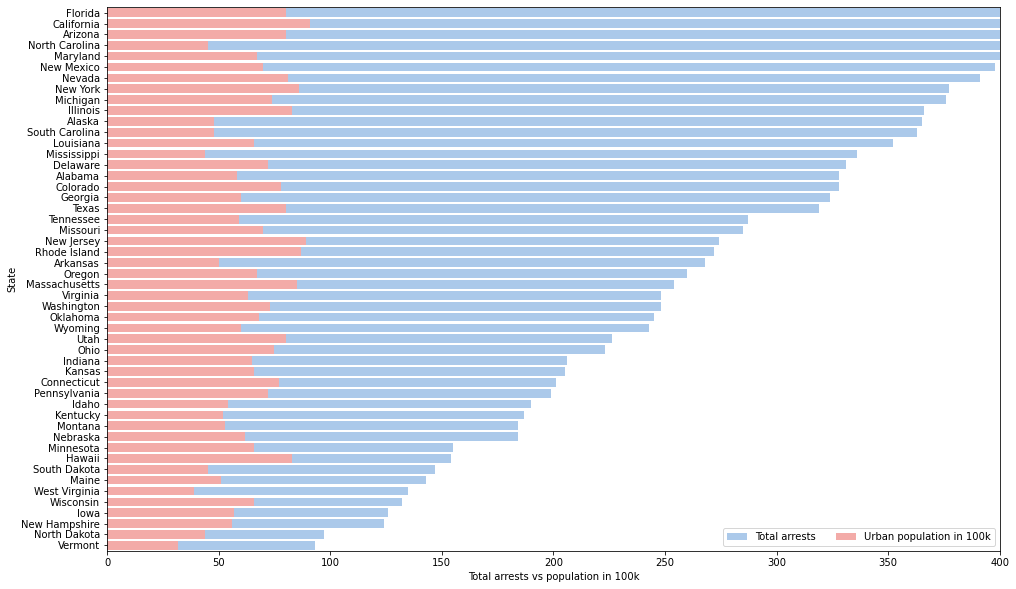

In [17]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

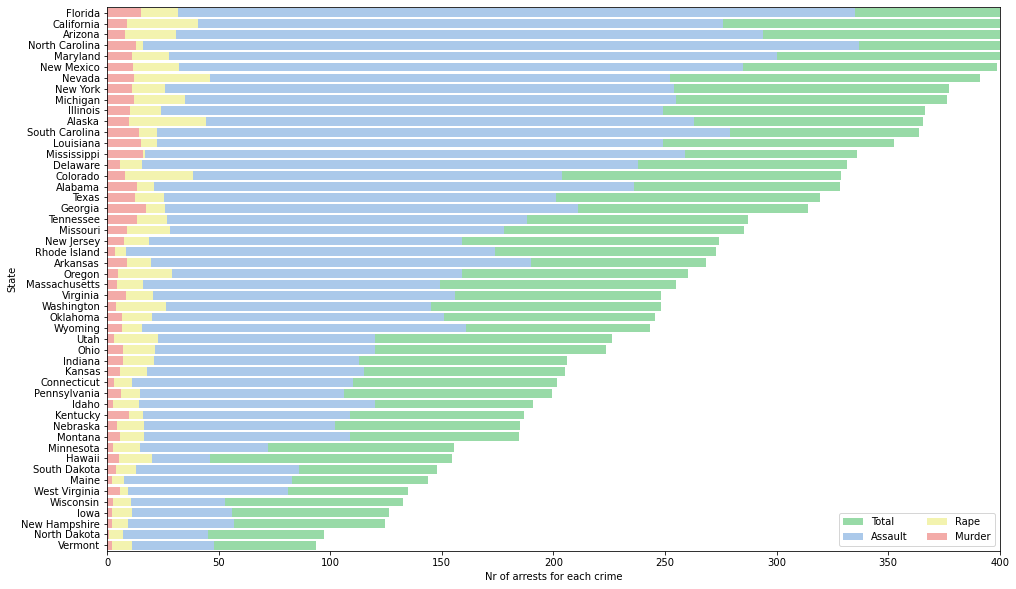

In [7]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

In [18]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

C:\Users\parin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.672852
4,5,50.051197
5,6,45.559514
6,7,40.935751
7,8,35.707496
8,9,31.454646
9,10,28.372332


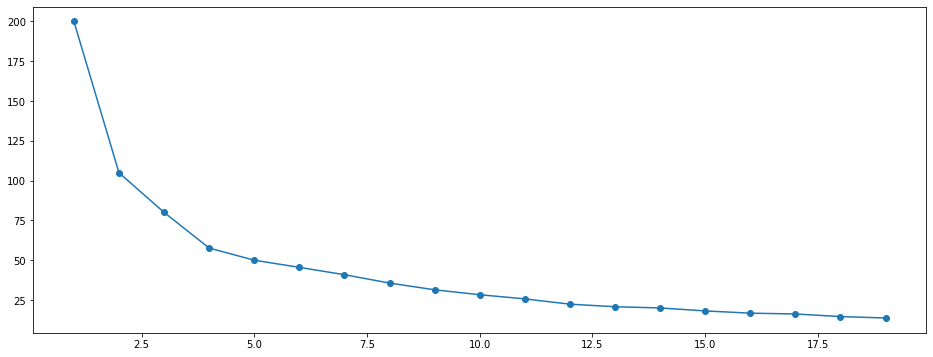

In [19]:

plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [20]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


C:\Users\parin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\parin\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


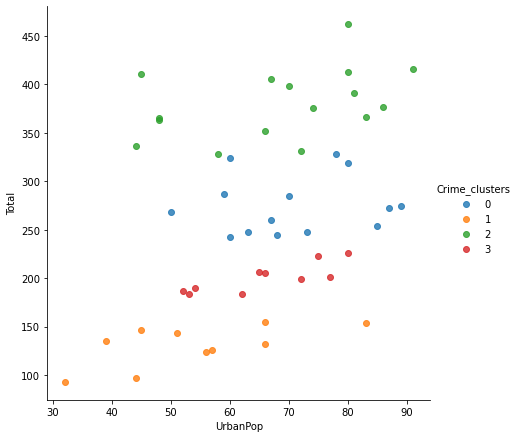

In [21]:

sns.lmplot('UrbanPop' ,'Total', data=df,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

C:\Users\parin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\parin\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


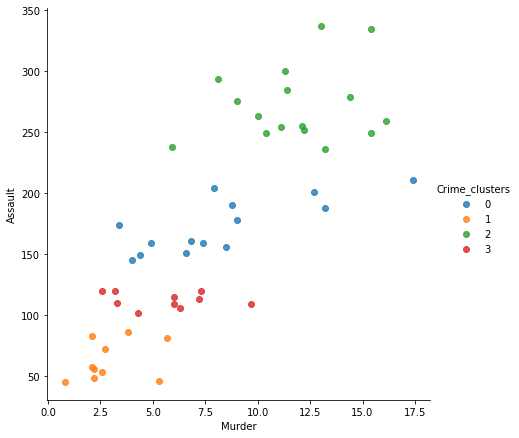

In [35]:
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

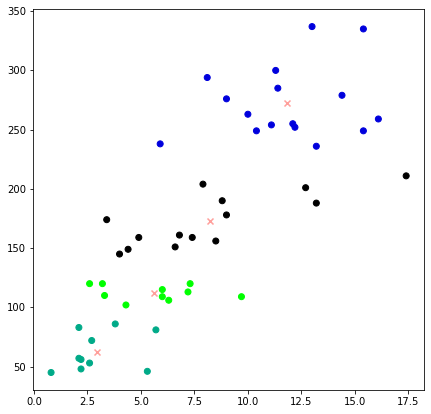

In [32]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.nipy_spectral (float(i) /5) for i in clusters.labels_]); 
#print(data)
#print(centers)

In [24]:
variables_correlation = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
variables_correlation.corr()

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


In [42]:
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

df_total.tail(50)


,State,Murder,Assault,UrbanPop,Rape,Total,Crime_clusters
44,Vermont,2.2,48,32,11.2,93,1
33,North Dakota,0.8,45,44,7.3,97,1
28,New Hampshire,2.1,57,56,9.5,124,1
14,Iowa,2.2,56,57,11.3,126,1
48,Wisconsin,2.6,53,66,10.8,132,1
47,West Virginia,5.7,81,39,9.3,135,1
18,Maine,2.1,83,51,7.8,143,1
40,South Dakota,3.8,86,45,12.8,147,1
10,Hawaii,5.3,46,83,20.2,154,1
22,Minnesota,2.7,72,66,14.9,155,1


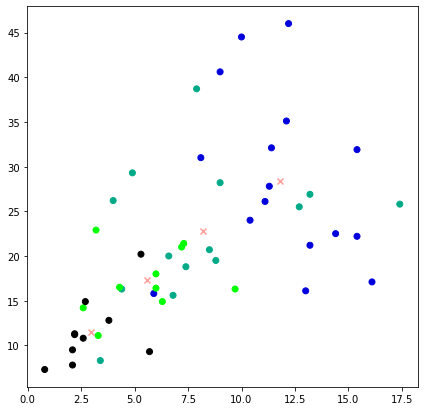

In [31]:

data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral (float(i) /5) for i in clusters.labels_]);